In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
%matplotlib inline

data=pd.read_csv('../data/heart2.csv')

https://www.kaggle.com/code/elouanguyon/pr-diction-maladies-cardiaques

**Nous avons les données suivantes dans notre base de données**

Age: Âge lors de la crise cardiaque

Sex: Sexe de la personne

ChestPainType: Type de douleur à la poitrine

RestingBP: Pression artérielle au repos (mm Hg)

Cholesterol: Cholesterol du patient (mm/dl)

FastingBS : Glycémie à jeun du patient (1 si FastingBS > 120 mg/dl, 0 sinon)

RestingECG: Résultat des électrocardiogrammes au repos (Normal: Normale, ST: Ondes ST-T abnormales (Invesions onde T  et/ou  augmentaion ou réduction de > 0.05 mV des ondes ST), LVH: Hypertrophie probable ou définitive du ventricule gauche selon le critères d'Estes)

MaxHR: Fréquence cardiaque maximale (entre 60 et 202 bpm)

ExerciseAngina: Angine causée par l'exercice (Y: Oui, N: Non)

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: Si le patient avait une maladie cardiaque (1: Oui, 0: Non)




In [116]:
# data=data.rename(columns = {
#     'age':'Age', 
#     'trestbps':'RestingBP', 
#     'chol':'Cholesterol', 
#     'thalach':'MaxHR', 
#     'oldpeak':'Oldpeak', 
#     'fbs':'FastingBS',
#     'sex':'Sex',
#     'cp':'ChestPainType',
#     'restecg':'RestingECG',
#     'exang':'ExerciseAngina',
#     'slope':'ST_Slope',
#     'target':'HeartDisease'})

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [117]:
# data = pd.get_dummies(data)
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'M' else 0)
data['RestingECG'] = data['RestingECG'].apply(lambda x: 1 if x == 'Normal' else 0)
data['ExerciseAngina'] = data['ExerciseAngina'].apply(lambda x: 1 if x == 'N' else 0)
data['ST_Slope'] = data['ST_Slope'].apply(lambda x: 1 if x == 'Up' else 0)
data['ChestPainType'] = data['ChestPainType'].apply(lambda x: 1 if x == 'ATA' else (0.5 if x == 'NAP' else 0))

data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1.0,140,289,0,1,172,1,0.0,1,0
1,49,0,0.5,160,180,0,1,156,1,1.0,0,1
2,37,1,1.0,130,283,0,0,98,1,0.0,1,0
3,48,0,0.0,138,214,0,1,108,0,1.5,0,1
4,54,1,0.5,150,195,0,1,122,1,0.0,1,0
5,39,1,0.5,120,339,0,1,170,1,0.0,1,0
6,45,0,1.0,130,237,0,1,170,1,0.0,1,0
7,54,1,1.0,110,208,0,1,142,1,0.0,1,0
8,37,1,0.0,140,207,0,1,130,0,1.5,0,1
9,48,0,1.0,120,284,0,1,120,1,0.0,1,0


In [118]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cols_normalize = ['Age',	'Sex',	'ChestPainType',	'RestingBP',	'Cholesterol',	'FastingBS',	'RestingECG',	'MaxHR'	,'ExerciseAngina',	'Oldpeak',	'ST_Slope']
scaler_minmax = MinMaxScaler()
data[cols_normalize] = scaler_minmax.fit_transform(data[cols_normalize])


data 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,1.0,0.70,0.479270,0.0,1.0,0.788732,1.0,0.295455,1.0,0
1,0.428571,0.0,0.5,0.80,0.298507,0.0,1.0,0.676056,1.0,0.409091,0.0,1
2,0.183673,1.0,1.0,0.65,0.469320,0.0,0.0,0.267606,1.0,0.295455,1.0,0
3,0.408163,0.0,0.0,0.69,0.354892,0.0,1.0,0.338028,0.0,0.465909,0.0,1
4,0.530612,1.0,0.5,0.75,0.323383,0.0,1.0,0.436620,1.0,0.295455,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,0.0,0.55,0.437811,0.0,1.0,0.507042,1.0,0.431818,0.0,1
914,0.816327,1.0,0.0,0.72,0.320066,1.0,1.0,0.570423,1.0,0.681818,0.0,1
915,0.591837,1.0,0.0,0.65,0.217247,0.0,1.0,0.387324,0.0,0.431818,0.0,1
916,0.591837,0.0,1.0,0.65,0.391376,0.0,0.0,0.802817,1.0,0.295455,0.0,1


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 86.2 KB


In [107]:
data.shape

(918, 12)

Nous n'avons pas de données manquantes, ce qui est une bonne nouvelle.


In [108]:
data.dtypes

Age                 int64
Sex                 int64
ChestPainType     float64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [109]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [110]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.299020,132.396514,198.799564,0.233115,0.601307,136.809368,0.595861,0.887364,0.430283,0.553377
std,9.432617,0.407701,0.393055,18.514154,109.384145,0.423046,0.489896,25.460334,0.490992,1.066570,0.495386,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,1.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,0.500000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,1.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000


In [119]:
#Nous divisons nos données en 2 ensembles: train et test. Nous allons entrainer notre modèle sur train afin de vérifier sur test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.2,random_state= 4)
train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
425,0.653061,1.0,1.0,0.800,0.442786,1.0,0.0,0.683099,1.0,0.352273,0.0,1
89,0.551020,1.0,0.0,0.700,0.379768,0.0,1.0,0.352113,0.0,0.352273,0.0,0
777,0.551020,1.0,1.0,0.650,0.434494,0.0,1.0,0.669014,1.0,0.295455,1.0,0
239,0.408163,1.0,0.0,0.800,0.320066,0.0,1.0,0.295775,0.0,0.636364,0.0,1
889,0.632653,1.0,0.0,0.670,0.338308,0.0,1.0,0.718310,1.0,0.386364,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.551020,0.0,0.0,0.640,0.339967,0.0,0.0,0.492958,0.0,0.522727,0.0,1
709,0.489796,1.0,0.0,0.625,0.351575,0.0,1.0,0.760563,1.0,0.409091,1.0,1
439,0.938776,1.0,0.5,0.690,0.000000,0.0,1.0,0.394366,1.0,0.318182,1.0,0
174,0.489796,1.0,0.0,0.700,0.441128,0.0,1.0,0.521127,0.0,0.522727,0.0,1


**Visualisons nos différentes données numériques**

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
425  0.653061    1            1.0      0.800     0.442786        1.0   
89   0.551020    1            0.0      0.700     0.379768        0.0   
777  0.551020    1            1.0      0.650     0.434494        0.0   
239  0.408163    1            0.0      0.800     0.320066        0.0   
889  0.632653    1            0.0      0.670     0.338308        0.0   
..        ...  ...            ...        ...          ...        ...   
897  0.551020    0            0.0      0.640     0.339967        0.0   
709  0.489796    1            0.0      0.625     0.351575        0.0   
439  0.938776    1            0.5      0.690     0.000000        0.0   
174  0.489796    1            0.0      0.700     0.441128        0.0   
122  0.367347    1            0.0      0.550     0.398010        0.0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
425           0  0.683099               1  0.352273         0  
89     

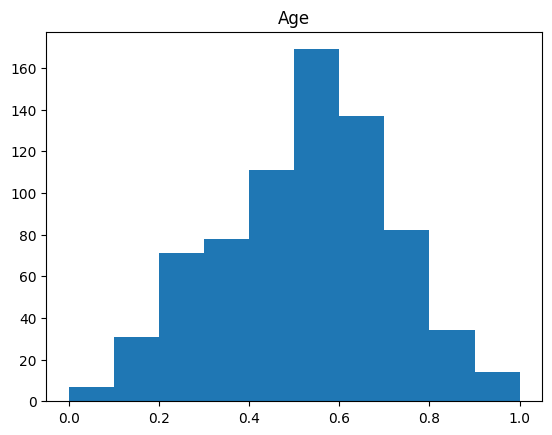

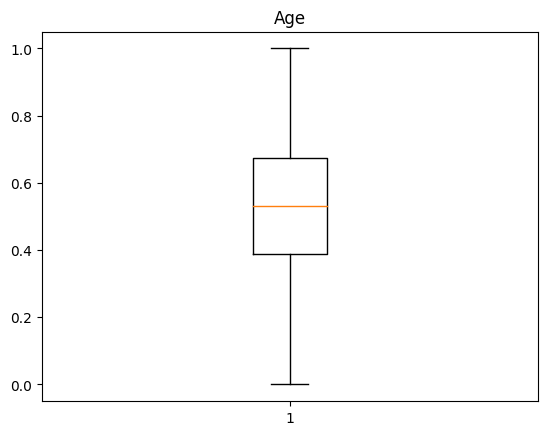

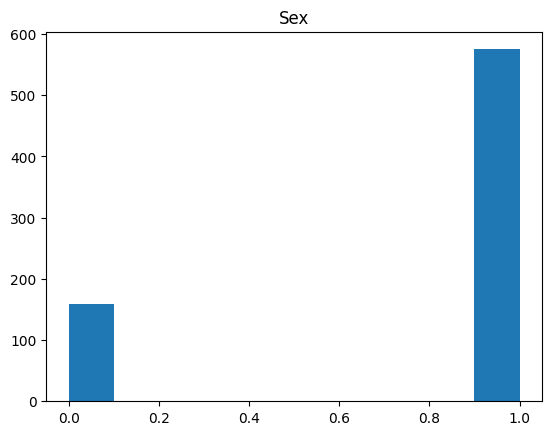

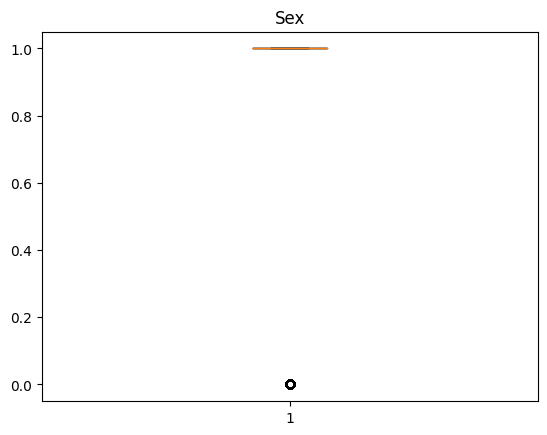

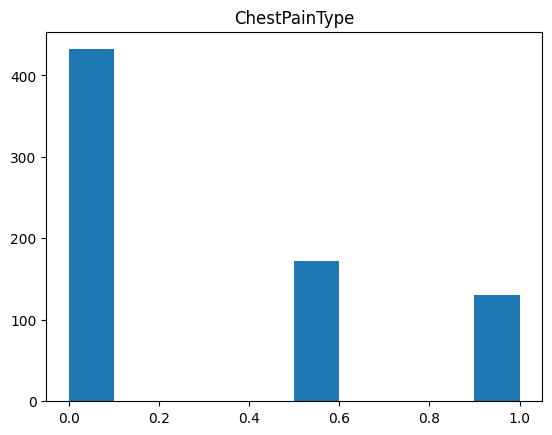

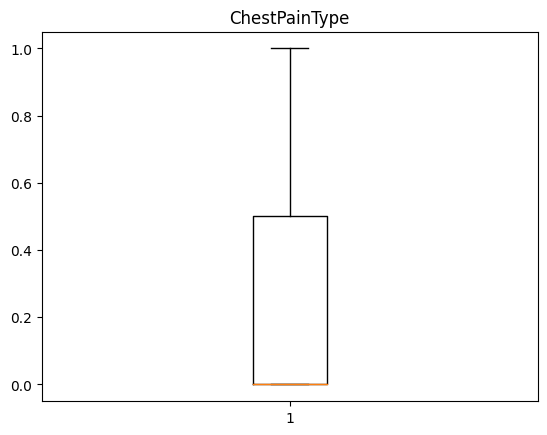

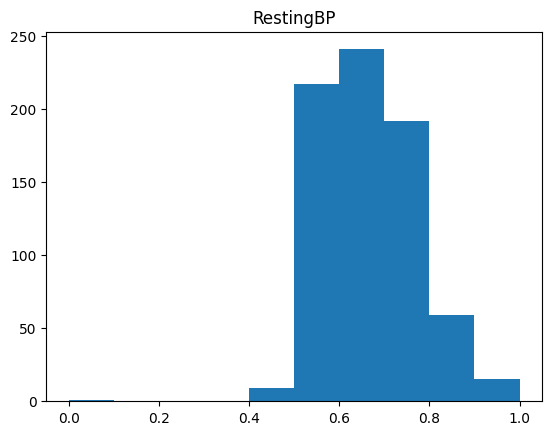

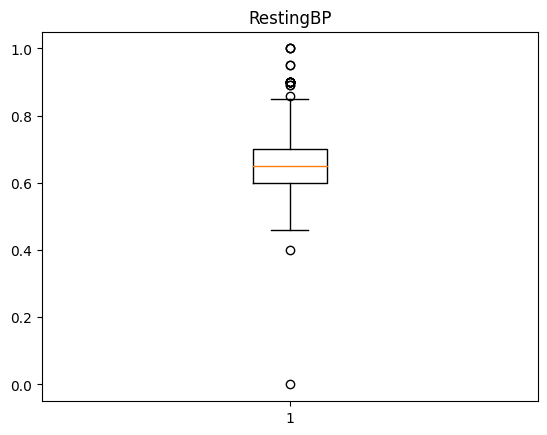

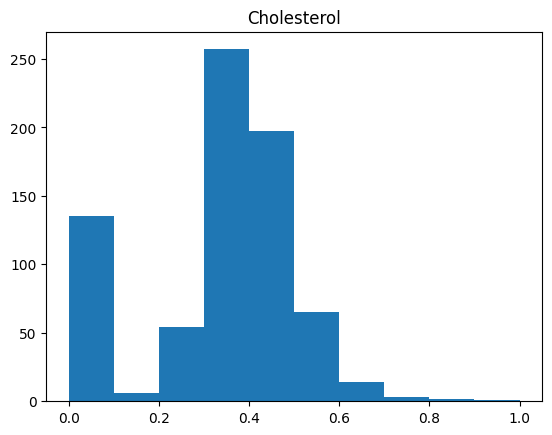

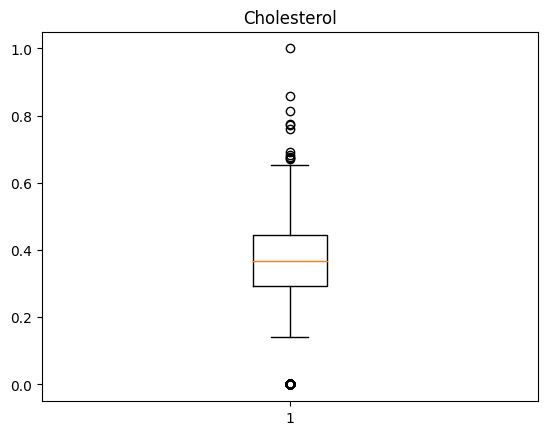

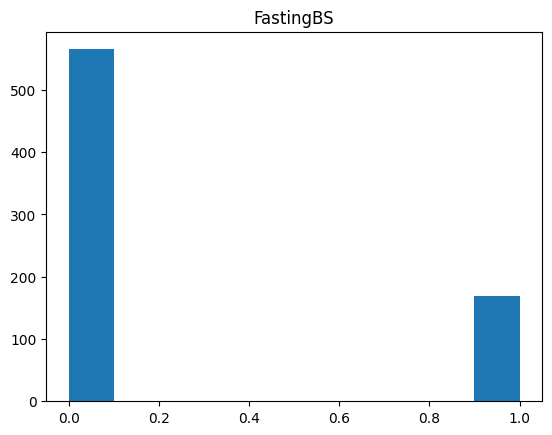

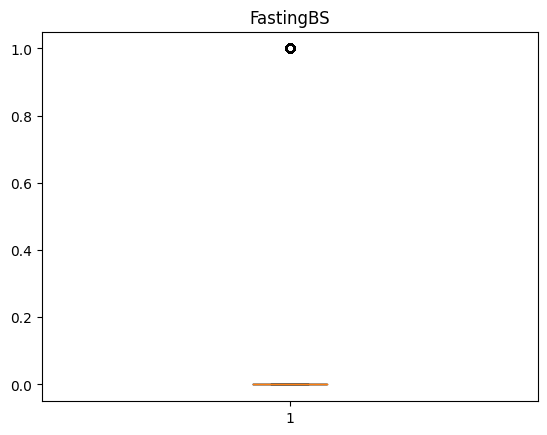

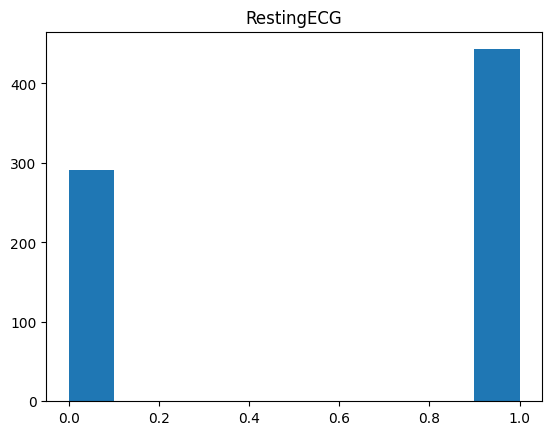

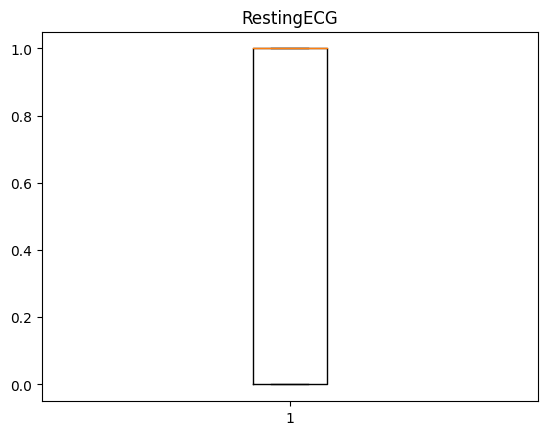

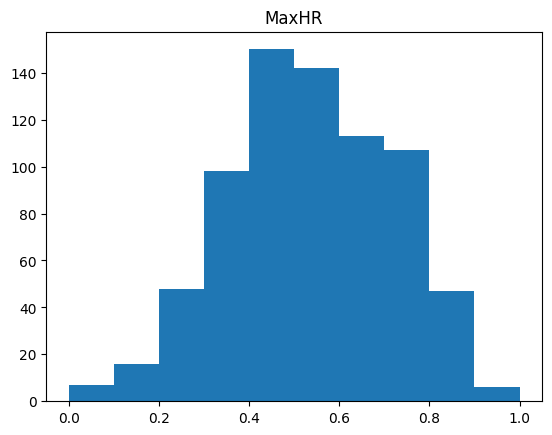

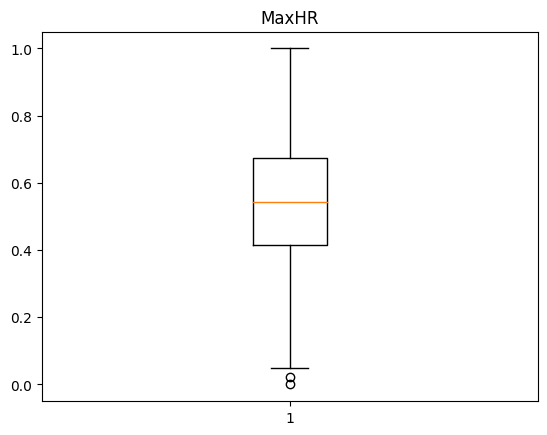

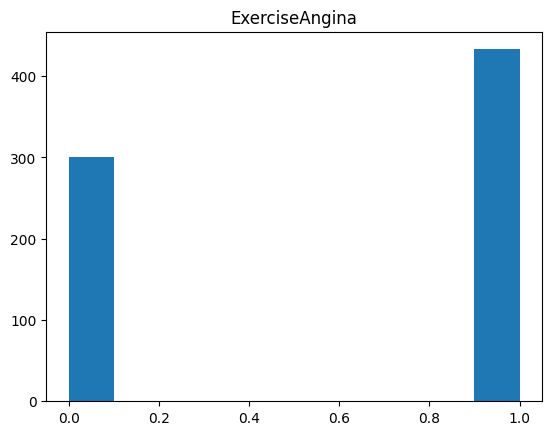

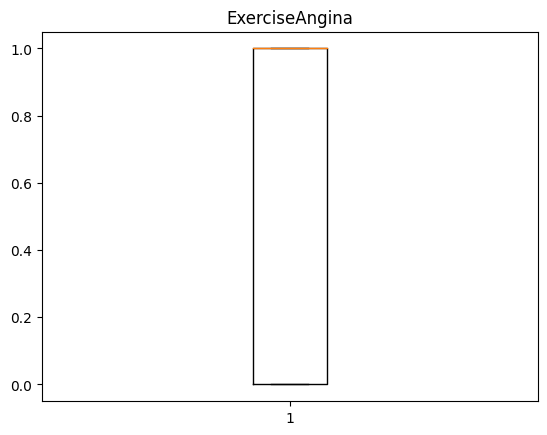

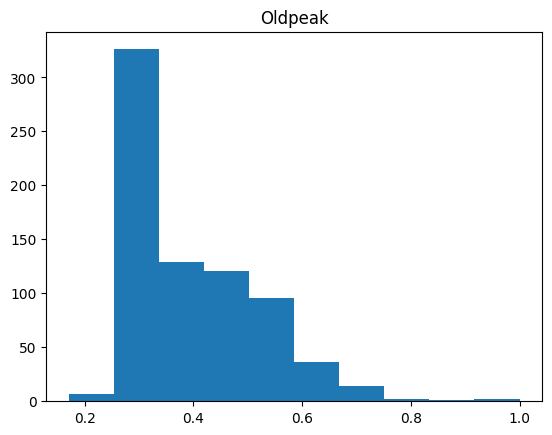

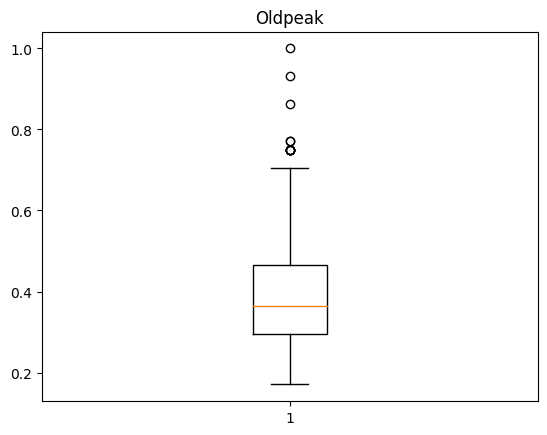

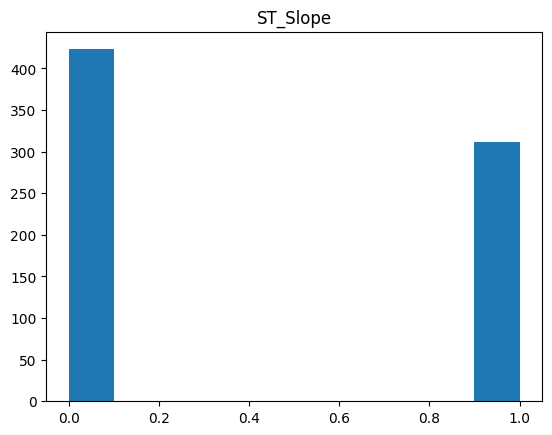

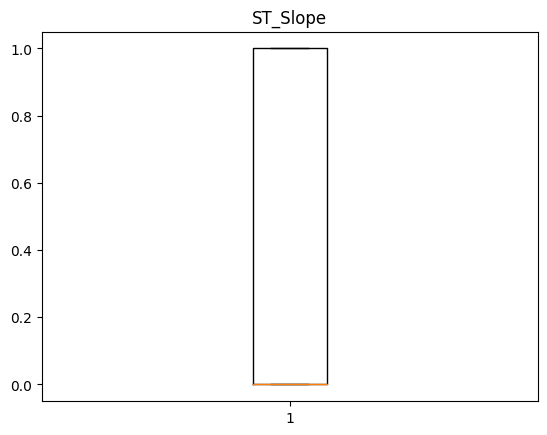

In [98]:

# train_data_quali = train[['Sex', 'ChestPainType', "FastingBS", 'RestingECG', 'ExerciseAngina', 'ST_Slope']]
train_data_num = train[['Age',	'Sex',	'ChestPainType',	'RestingBP',	'Cholesterol',	'FastingBS',	'RestingECG',	'MaxHR'	,'ExerciseAngina',	'Oldpeak',	'ST_Slope']]
print(train_data_num)
for i in train_data_num.columns:    
    plt.hist(train_data_num[i])
    plt.title(i)
    plt.show()
    plt.boxplot(train_data_num[i])
    plt.title(i)
    plt.show()

**Regardons les corrélations entre les différentes variables numériques**

<Axes: >

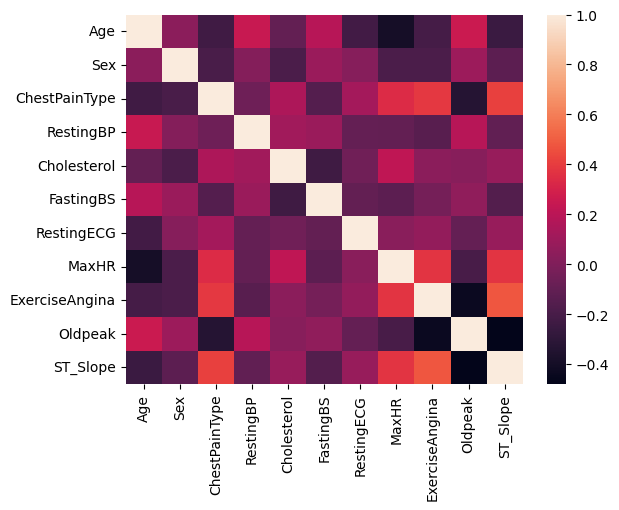

In [99]:
sns.heatmap(train_data_num.corr())

On n'a pas vraiment de corrélation positive mais il  y a quelques légères corrélations négatives comme l'âge et la fréqueence cardiaque et la glycémie et le cholesterol

In [88]:
pd.pivot_table(train, index="HeartDisease", values=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'])

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingBP
HeartDisease,,,,,,
0,0.462606,0.377780,0.10559,0.615978,0.343238,0.651196
1,0.573261,0.295191,0.32767,0.475540,0.442603,0.671553


On peut commencer à tracer le profil d'une personne ayant eu un arrêt cardiaque (ce n'est pas définitif et pas forcément vrai. C'est une première esquisse): il est généralement plus vieux, a un cholesterol plus faible, il a 3 fois plus de chance d'avoir un taux de glycémie à jeun de 120mg/dl ou plus. Il a une fréquance cardiaque maximale faible etc...

Regardons maintenant les données qualitatives

In [89]:
train_data_quali = train[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]

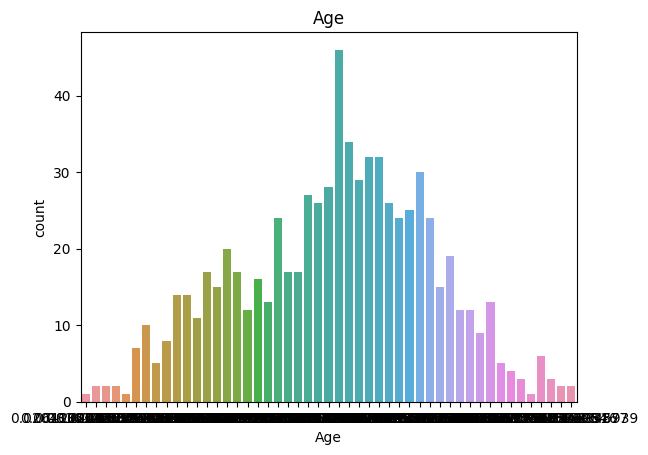

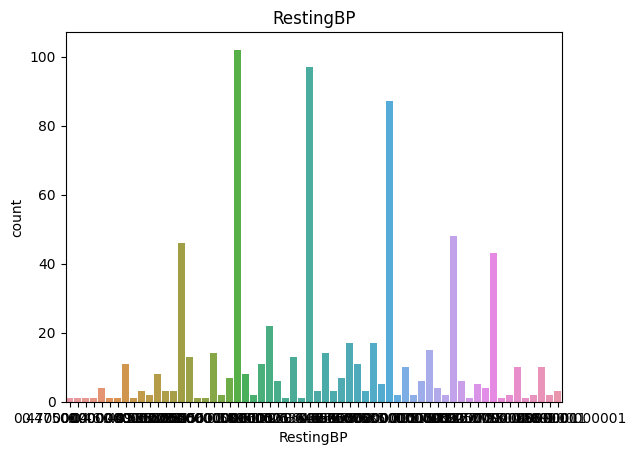

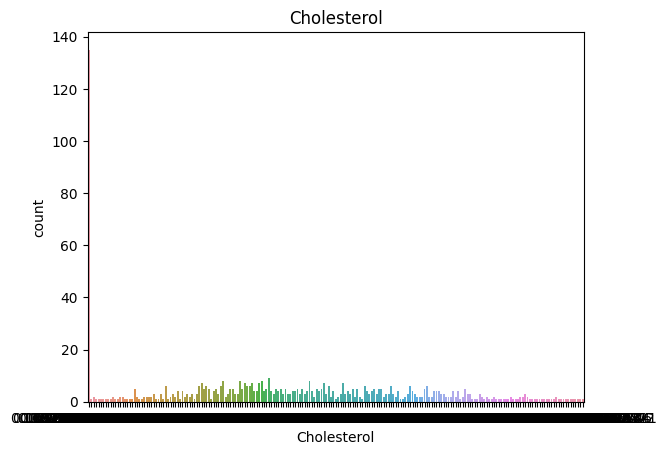

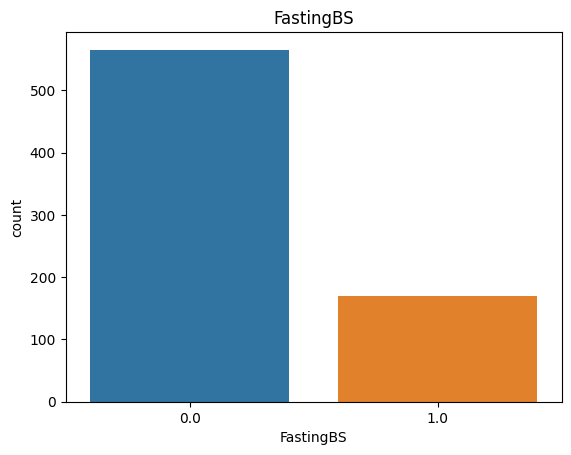

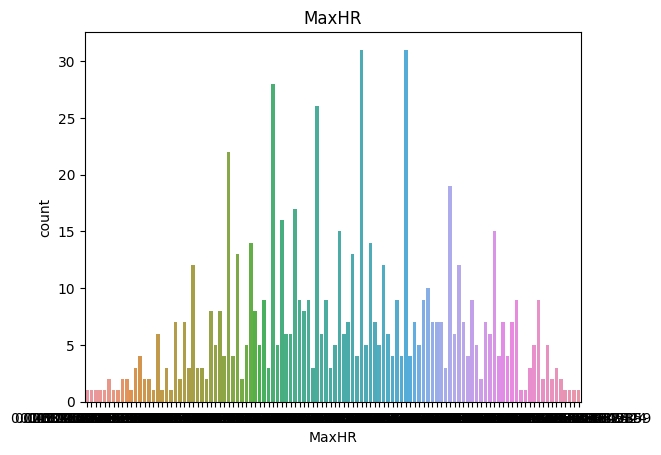

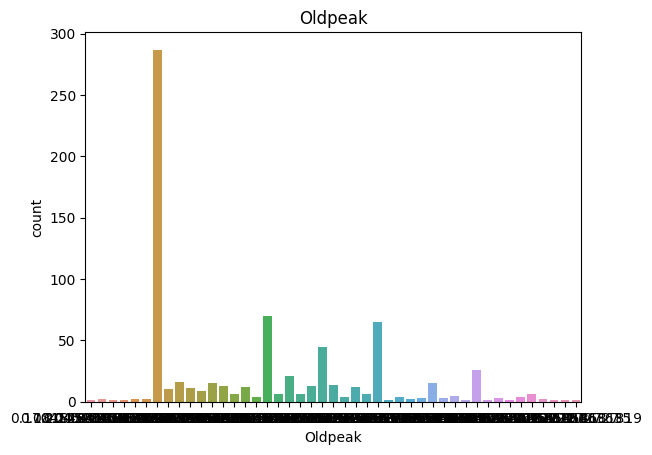

In [90]:
for info in train_data_quali.columns:
    sns.barplot(x=train_data_quali[info].value_counts().index, y=train_data_quali[info].value_counts()).set_title(info)
    plt.show()

In [62]:
# Pour entrainer nos modèles, il va falloir convertir nos données qualitatives en données numériques en utilisant get_dummies

train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [112]:
#Vérifions que les données ont bien été remplacées
train.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
425,60,1,1.0,160,267,1,0,157,1,0.5,0,1
89,55,1,0.0,140,229,0,1,110,0,0.5,0,0
777,55,1,1.0,130,262,0,1,155,1,0.0,1,0
239,48,1,0.0,160,193,0,1,102,0,3.0,0,1
889,59,1,0.0,134,204,0,1,162,1,0.8,1,1


Nous allons enlever la colonne HeartDisease de test afin que nous puissons faire nos prédictoins avant de comparer nos résultats à ceux de cette colonne

In [120]:
# C'est le moment
x_train = train.drop(columns = ["HeartDisease"])
y_train = train["HeartDisease"]

x_test = test.drop(columns = ["HeartDisease"])
y_test = test["HeartDisease"]




J'ai fait des recherches sur le type de régression à utiliser parce qu'il y en a beaucoup et je ne les connais pas toutes. Je suis tombé sur une vidéo qui explique brièvement quelle régression utiliser selon le scénario et dans mon cas, la "Binary Logistic Regression" serait la régression à effectuer dans mon cas (on cherche une réponse tranchée avec seulement deux options: oui on non (https://youtu.be/i8tjLQUPc8Y). Cela s'est confirmé quand j'ai trouvé un pdf de Claremont Graduate University dans lequel il est écrit que la "Binary Logistic Regression" est utilse lorsqu'on a affaire à un choix entre deux possibiéités. http://wise.cgu.edu/wp-content/uploads/2016/07/Introduction-to-Logistic-Regression.pdf

In [121]:
from sklearn.linear_model import LogisticRegression
import sklearn
# En faisant mes recherches, j'ai remarqué que beaucoup de gens utilisaient le paramètre max_iter 
# de LogisticRegression alors j'ai décidé d'en tester quelques uns afin de trouver le nombre qui va 
# maximiser mon résultat (je pense que le plus sera le mieux)

# j'essayais max_iter avec 500 et il y avait des erreurs. Fonctionne avec 1000 et plus. Fonctionne à partir de 639. 
# On peut voir que pour ce scénario, max_iter n'a pas d'importance
for i in range(1000,25000,2000):
    Log_Reg = LogisticRegression(max_iter=i)
    modele=Log_Reg.fit(x_train, y_train)
    print("Précision train:",modele.score(x_train, y_train),"\n","Précision test:",modele.score(x_test,y_test))

Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043
Précision train: 0.8623978201634878 
 Précision test: 0.8695652173913043


# Amélioration du modèle

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

0.8596815994076268

En résumé, ce code utilise la bibliothèque scikit-learn (sklearn) pour créer un classificateur K plus proches voisins (KNeighborsClassifier). La valeur n_neighbors est définie à 12, ce qui signifie que lors de la classification, l'algorithme considérera les 12 voisins les plus proches d'un point donné.

Ensuite, le code utilise la validation croisée avec 10 plis (cross-validation with 10 folds) pour évaluer les performances du classificateur. Cela signifie que l'ensemble de données d'entraînement est divisé en 10 parties égales, appelées "plis". Le classificateur est entraîné et évalué 10 fois, chaque fois en utilisant un pli différent comme ensemble de validation et les 9 autres plis comme ensemble d'entraînement. Cela permet d'obtenir une estimation plus fiable des performances du classificateur.

La fonction cross_val_score retourne un tableau de scores, où chaque score correspond à la performance du classificateur sur un pli de validation spécifique.

Enfin, la méthode .mean() est utilisée pour calculer la moyenne des scores obtenus lors de la validation croisée. Cela donne une estimation générale des performances du classificateur sur l'ensemble de données d'entraînement.

N'oubliez pas d'importer les bibliothèques nécessaires, telles que sklearn.neighbors, et de vous assurer que les données d'entraînement (x_train et y_train) sont correctement définies avant d'exécuter ce code.

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x_train,y_train,cv=10)
score.mean()

0.8487782302850796

Ce code utilise la bibliothèque scikit-learn (sklearn) pour créer un classificateur de type Random Forest (RandomForestClassifier). La valeur n_estimators est définie à 10, ce qui signifie que le classificateur sera constitué de 10 arbres de décision.

Ensuite, le code utilise la validation croisée (cross-validation) avec 10 plis (folds) pour évaluer les performances du classificateur. La fonction cross_val_score retourne un tableau de scores pour chaque pli de validation.

Enfin, la moyenne des scores est calculée à l'aide de la méthode .mean() pour obtenir une estimation générale des performances du classificateur.

Assurez-vous d'avoir importé les bibliothèques nécessaires et d'avoir les données d'entraînement (x_train et y_train) correctement définies avant d'exécuter ce code.

In [21]:
# Calcul des corrélations entre les variables
correlations = data.corr()

# Affichage des corrélations
sns.heatmap(correlations)


ValueError: could not convert string to float: 'M'

In [ ]:
correlations

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ca,thal,HeartDisease
Age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
Sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
ChestPainType,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
RestingBP,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
Cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
FastingBS,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
RestingECG,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
MaxHR,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
ExerciseAngina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
Oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [22]:
def Logistic_Regression(data, seuil=0.1):

    # Sélection des colonnes à conserver en fonction de leur corrélation
    colonnes_a_garder = correlations[abs(correlations['HeartDisease']) >= seuil].index.tolist()

    # Nouveau DataFrame avec les colonnes sélectionnées
    df_nouveau = data[colonnes_a_garder]

    # Séparation des données en x_train et y_train à partir du nouveau DataFrame
    x_train_nouveau = df_nouveau.drop('HeartDisease', axis=1)
    y_train_nouveau = df_nouveau['HeartDisease']

    # Création d'un DataFrame à partir des données de test
    df_test = x_test

    # Ajout de la colonne de variable cible (y_test) au DataFrame
    df_test['HeartDisease'] = y_test

    # Ajout de la colonne de variable cible (y_test) au DataFrame

    # Sélection des colonnes à conserver en fonction de leur corrélation
    colonnes_a_garder_test = df_test[colonnes_a_garder]

    # Séparation des données en x_test_nouveau et y_test_nouveau
    x_test_nouveau = colonnes_a_garder_test.drop('HeartDisease', axis=1)
    y_test_nouveau = colonnes_a_garder_test['HeartDisease']
    
    # , solver="saga", random_state=10, class_weight= "balanced"
    Log_Reg = LogisticRegression(max_iter=3000, solver="saga", random_state=10, class_weight= "balanced")
    modele=Log_Reg.fit(x_train_nouveau, y_train_nouveau)
    text =  "Précision train: " + str(modele.score(x_train_nouveau, y_train_nouveau))," Précision test: " + str(modele.score(x_test_nouveau,y_test_nouveau)),"Seuil de corrélation : " + str(seuil)
    return text


In [23]:
for i in np.arange(0, 0.5, 0.1):
    print(Logistic_Regression(data, i))


NameError: name 'correlations' is not defined